In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
#Choosing categories we require 
categories = ['alt.atheism','soc.religion.christian','comp.graphics','sci.med']
#Will take data from the folder train/test
news_train = fetch_20newsgroups(subset='train',categories=categories,shuffle=True)
news_test = fetch_20newsgroups(subset='test',categories=categories,shuffle=True)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
text = ["The quick brown fox jumped over the lazy dog.","The dog.","The fox"]
vector = CountVectorizer()
vector.fit(text)
print("Print Vocabulary: "+ str(vector.vocabulary_)+'\n]n')
vector.get_feature_names()
print("Features names:" + str(vector.get_feature_names())+'\n\n')
counts = vector.transform(text)
print("Printing count:"+'\n'+str(counts.toarray()))

Print Vocabulary: {'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
]n
Features names:['brown', 'dog', 'fox', 'jumped', 'lazy', 'over', 'quick', 'the']


Printing count:
[[1 1 1 1 1 1 1 2]
 [0 1 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 1]]


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_tf = count_vect.fit_transform(news_train.data)
X_train_tf.shape

(2257, 35788)

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer
#create the transform
vectorizer = TfidfTransformer()
vectorizer.fit(counts)
print('Learning Frequency of all features:'+ str(vectorizer.idf_)+'\n\n')

freq = vectorizer.transform(counts)
print('Transforming the matrix based on the learnt frequencies or weight:\n\n'+ str(freq.toarray()))


Learning Frequency of all features:[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]


Transforming the matrix based on the learnt frequencies or weight:

[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]
 [0.         0.78980693 0.         0.         0.         0.
  0.         0.61335554]
 [0.         0.         0.78980693 0.         0.         0.
  0.         0.61335554]]


In [6]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_tf)
X_train_tfidf.shape

(2257, 35788)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train_tfidf,news_train.target)

KNeighborsClassifier()

In [8]:
X_test_tf = count_vect.transform(news_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_tf)
predicted = model.predict(X_test_tfidf)

In [9]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(news_test.target,predicted))
print(metrics.classification_report(news_test.target,predicted,target_names=news_test.target_names)),metrics.confusion_matrix(news_test.target,predicted)

Accuracy: 0.7656458055925432
                        precision    recall  f1-score   support

           alt.atheism       0.58      0.87      0.70       319
         comp.graphics       0.91      0.79      0.85       389
               sci.med       0.89      0.58      0.70       396
soc.religion.christian       0.78      0.84      0.81       398

              accuracy                           0.77      1502
             macro avg       0.79      0.77      0.76      1502
          weighted avg       0.80      0.77      0.77      1502



(None,
 array([[277,   3,   9,  30],
        [ 53, 309,  11,  16],
        [ 93,  24, 231,  48],
        [ 54,   2,   9, 333]], dtype=int64))

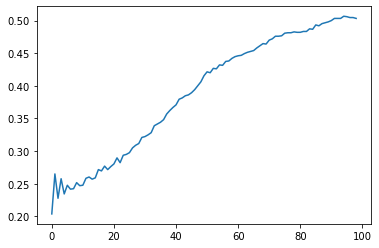

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
error_rates=[]
for i in np.arange(1, 100):
    new_model = KNeighborsClassifier(n_neighbors = i)
    new_model.fit(X_train_tfidf,news_train.target)
    new_predictions = new_model.predict(X_test_tfidf)
    error_rates.append(np.mean(new_predictions != news_test.target))
plt.plot(error_rates)

In [12]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train_tfidf,news_train.target)
X_test_tf = count_vect.transform(news_test.data)
X_test_tfidf = tfidf_transformer.transform(X_test_tf)
predicted = model.predict(X_test_tfidf)
print("Accuracy:",accuracy_score(news_test.target,predicted))
print(metrics.classification_report(news_test.target,predicted,target_names=news_test.target_names)),metrics.confusion_matrix(news_test.target,predicted)


Accuracy: 0.796271637816245
                        precision    recall  f1-score   support

           alt.atheism       0.66      0.87      0.75       319
         comp.graphics       0.90      0.81      0.85       389
               sci.med       0.86      0.72      0.79       396
soc.religion.christian       0.80      0.80      0.80       398

              accuracy                           0.80      1502
             macro avg       0.80      0.80      0.80      1502
          weighted avg       0.81      0.80      0.80      1502



(None,
 array([[278,   7,  13,  21],
        [ 35, 316,  23,  15],
        [ 42,  25, 285,  44],
        [ 68,   4,   9, 317]], dtype=int64))